In [2]:
import pandas as pd
loansData = pd.read_csv('https://github.com/Thinkful-Ed/curric-data-001-data-sets/raw/master/loans/loansData.csv')

In [3]:
loansData['Interest.Rate'][0:5]

81174     8.90%
99592    12.12%
80059    21.98%
15825     9.99%
33182    11.71%
Name: Interest.Rate, dtype: object

In [4]:
loansData['Loan.Length'][0:5]

81174    36 months
99592    36 months
80059    60 months
15825    36 months
33182    36 months
Name: Loan.Length, dtype: object

In [5]:
loansData['FICO.Range'][0:5]

81174    735-739
99592    715-719
80059    690-694
15825    695-699
33182    695-699
Name: FICO.Range, dtype: object

In [6]:
loansData['Interest.Rate'] = loansData['Interest.Rate'].map(lambda val: round(float(val.strip('%'))/100, 4))

In [7]:
loansData['Interest.Rate'][0:5]

81174    0.0890
99592    0.1212
80059    0.2198
15825    0.0999
33182    0.1171
Name: Interest.Rate, dtype: float64

In [8]:
loansData['Loan.Length'] = loansData['Loan.Length'].map(lambda val: int(val.strip(' months')))

In [9]:
loansData['Loan.Length'][0:5]

81174    36
99592    36
80059    60
15825    36
33182    36
Name: Loan.Length, dtype: int64

In [29]:
loansData['FICO.Score'] = loansData['FICO.Range'].map(lambda val: str(val).split('-'))

In [30]:
loansData['FICO.Score'][0:5]

81174    [735, 739]
99592    [715, 719]
80059    [690, 694]
15825    [695, 699]
33182    [695, 699]
Name: FICO.Score, dtype: object

In [31]:
loansData['FICO.Score'][0:5].values[0]

['735', '739']

In [32]:
type(loansData['FICO.Score'][0:5].values[0][0])

str

In [33]:
loansData['FICO.Score'] = loansData['FICO.Score'].map(lambda val: [int(n) for n in val])

In [34]:
type(loansData['FICO.Score'][0:5].values[0][0])

int

In [35]:
loansData['FICO.Score'][0:5]

81174    [735, 739]
99592    [715, 719]
80059    [690, 694]
15825    [695, 699]
33182    [695, 699]
Name: FICO.Score, dtype: object

In [36]:
loansData['FICO.Score'] = loansData['FICO.Score'].map(lambda val: val[0])
loansData['FICO.Score'][0:5]

81174    735
99592    715
80059    690
15825    695
33182    695
Name: FICO.Score, dtype: int64

In [45]:
%matplotlib inline
import matplotlib.pyplot as plt

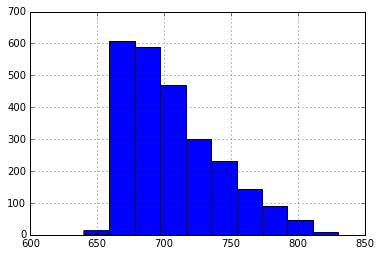

In [46]:
plt.figure()
p = loansData['FICO.Score'].hist()
plt.show()

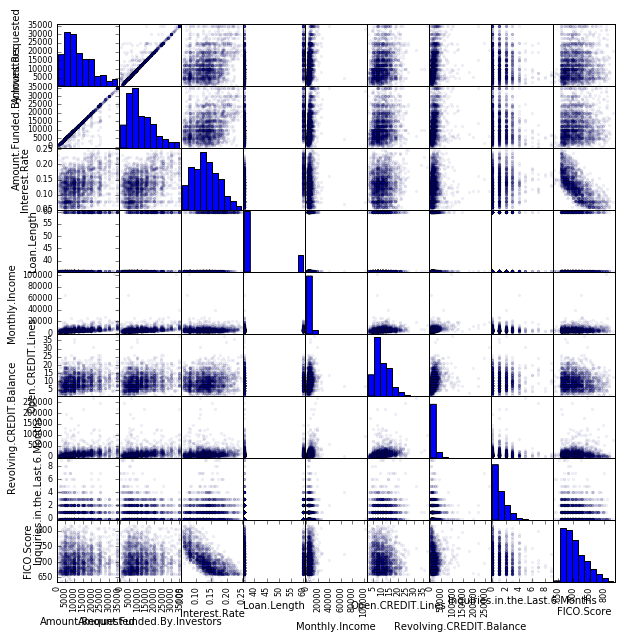

In [47]:
a = pd.scatter_matrix(loansData, alpha=0.05, figsize=(10,10))

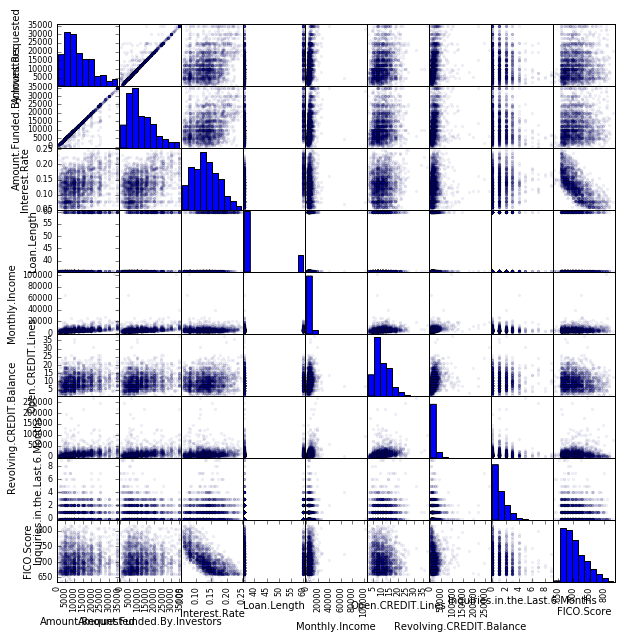

In [49]:
a = pd.scatter_matrix(loansData, alpha=0.05, figsize=(10,10), diagonal='hist')


In [52]:
import numpy as np
import pandas as pd
import statsmodels.api as sm

intrate = loansData['Interest.Rate']
loanamt = loansData['Amount.Requested']
fico = loansData['FICO.Score']

# The dependent variable
y = np.matrix(intrate).transpose()
# The independent variables shaped as columns
x1 = np.matrix(fico).transpose()
x2 = np.matrix(loanamt).transpose()

In [53]:
x = np.column_stack([x1,x2])

In [54]:
X = sm.add_constant(x)
model = sm.OLS(y,X)
f = model.fit()
f.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.657
Model:                            OLS   Adj. R-squared:                  0.656
Method:                 Least Squares   F-statistic:                     2388.
Date:                Mon, 21 Mar 2016   Prob (F-statistic):               0.00
Time:                        17:21:35   Log-Likelihood:                 5727.6
No. Observations:                2500   AIC:                        -1.145e+04
Df Residuals:                    2497   BIC:                        -1.143e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const          0.7288      0.010     73.734      0.000         0.709     0.748
x1            -0.0009    1.4e-05    -63.022      0.000        -0.001    -0.001
x2          2.107e-06    6.3e-08     33.443      0.000      1.98e-06  2.23e-06
==============================================================================
Omnibus:                       69.496   Durbin-Watson:                   1.979
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               77.811
Skew:                           0.379   Prob(JB):                     1.27e-17
Kurtosis:                       3.414   Cond. No.                     2.96e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.96e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""